# Módulo 10 tarefa 2

Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Com o que você viu em aula, faça uma análise das variáveis qualitativas (posse de imóvel e posse de veículo) para verificar se são boas preditoras de *renda*. Alguma delas parece discriminar *renda* de forma estatisticamente significante?

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
previsao_renda = pd.read_csv('previsao_de_renda.csv')
previsao_renda.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [3]:
previsao_renda = previsao_renda.drop(['Unnamed: 0', 'data_ref', 'index'], axis=1)
previsao_renda.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [4]:
previsao_renda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   15000 non-null  object 
 1   posse_de_veiculo       15000 non-null  bool   
 2   posse_de_imovel        15000 non-null  bool   
 3   qtd_filhos             15000 non-null  int64  
 4   tipo_renda             15000 non-null  object 
 5   educacao               15000 non-null  object 
 6   estado_civil           15000 non-null  object 
 7   tipo_residencia        15000 non-null  object 
 8   idade                  15000 non-null  int64  
 9   tempo_emprego          12466 non-null  float64
 10  qt_pessoas_residencia  15000 non-null  float64
 11  mau                    15000 non-null  bool   
 12  renda                  15000 non-null  float64
dtypes: bool(3), float64(3), int64(2), object(5)
memory usage: 1.2+ MB


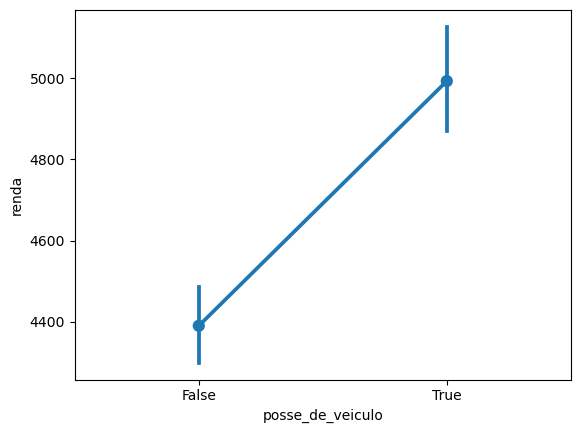

In [5]:
an_qual_veic = sns.pointplot(data=previsao_renda, x='posse_de_veiculo', y='renda',
                       dodge=True)

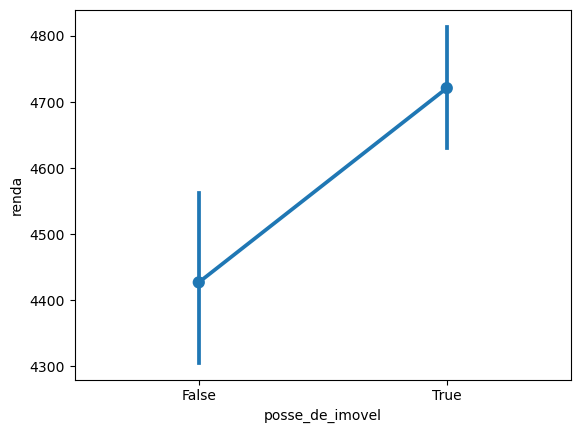

In [6]:
an_qual_imov = sns.pointplot(data=previsao_renda, x='posse_de_imovel', y='renda',
                       dodge=True)

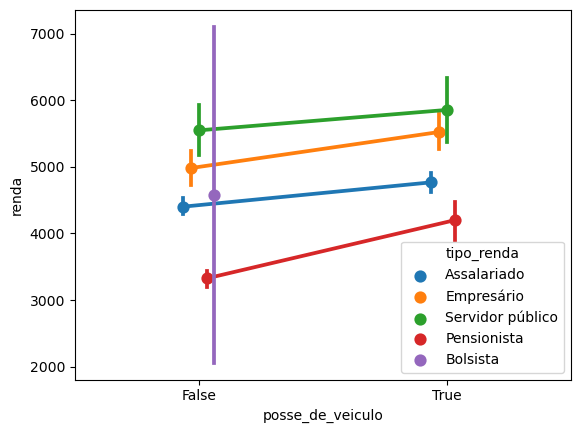

In [7]:
an_qual_veic_tipo_renda = sns.pointplot(x="posse_de_veiculo", y="renda", hue = 'tipo_renda',
                   data=previsao_renda, dodge=True)

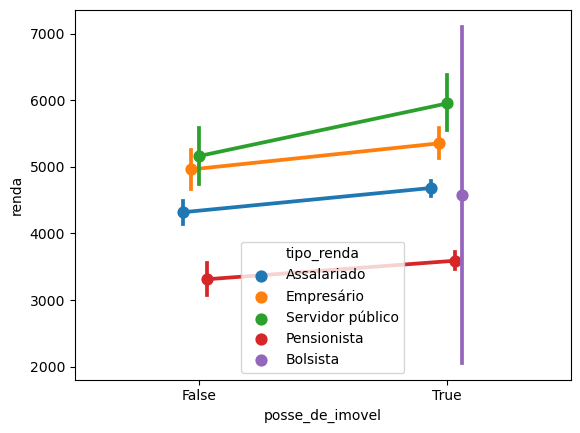

In [8]:
an_qual_imov_tipo_renda = sns.pointplot(x="posse_de_imovel", y="renda", hue = 'tipo_renda',
                   data=previsao_renda, dodge=True)

In [9]:
bolsista = previsao_renda[previsao_renda['tipo_renda'] == 'Bolsista']
bolsista

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
1672,F,False,True,0,Bolsista,Superior completo,Casado,Casa,51,10.69589,2.0,False,7103.23
1859,F,False,True,0,Bolsista,Superior completo,Casado,Casa,51,10.69589,2.0,False,7103.23
2199,F,False,True,0,Bolsista,Superior completo,Casado,Casa,51,10.69589,2.0,False,964.02
11537,F,False,True,0,Bolsista,Superior completo,Casado,Casa,51,10.69589,2.0,False,3149.77


Em ambos os casos, em média, quem possui veículo e quem possui imvóvel tende a ter uma renda maior. Essa diferença é maior para o caso da posse de veículo.
Ao comparar essa variação entre os tipos de renda na base de dados, a diferença continua existindo, é sempre maior a renda de quem possui tanto veículo como imóvel, mas a diferença é baixa em comparação ao quadro geral.
Curiosamente, pessoas com o tipo de renda "Bolsistas", 100% delas possuem imóvel e não possuem veículo (contém apenas 4 bolsistas nessa base de dados).